# Ánalise dos dados diários dos últimos 6 meses do Fundo Imobiliário do Iguatemi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [4]:
base = pd.read_csv('daily_six_month_igta3.csv')
base.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,IGTA3,Date,Close
2,NaN,NaN,06/07/2020 16:56:00,"36,1"
3,NaN,NaN,07/07/2020 16:56:00,"35,42"
4,NaN,NaN,08/07/2020 16:56:00,"35,5"


In [5]:
base = base.iloc[2:,2:]
base.columns = ["Date", "Close"]	

In [6]:
base.head()

,Date,Close
2,06/07/2020 16:56:00,"36,1"
3,07/07/2020 16:56:00,"35,42"
4,08/07/2020 16:56:00,"35,5"
5,10/07/2020 16:56:00,"36,54"
6,13/07/2020 16:56:00,"35,38"


In [7]:
base = base.reset_index().drop(['index'], axis=1)
base.head()

,Date,Close
0,06/07/2020 16:56:00,"36,1"
1,07/07/2020 16:56:00,"35,42"
2,08/07/2020 16:56:00,"35,5"
3,10/07/2020 16:56:00,"36,54"
4,13/07/2020 16:56:00,"35,38"


In [8]:
base.dtypes

Date     object
Close    object
dtype: object

In [9]:
# Temos que transformaresses objetos em valores de verdade.
from datetime import datetime
date_parser = lambda date: datetime.strptime(date.split(' ')[0], '%d/%m/%Y')
base.Date = base.Date.map(date_parser)

# Agora ao valor em Reais
base.Close = base.Close.replace(',', '.', regex=True).astype(float)

In [10]:
base.head()

,Date,Close
0,2020-07-06,36.10
1,2020-07-07,35.42
2,2020-07-08,35.50
3,2020-07-10,36.54
4,2020-07-13,35.38


In [11]:
base.index = base.Date
base.drop(['Date'], axis=1, inplace=True)

In [12]:
base.head()

,Close
Date,
2020-07-06,36.10
2020-07-07,35.42
2020-07-08,35.50
2020-07-10,36.54
2020-07-13,35.38


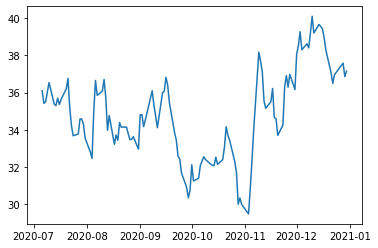

In [13]:
plt.plot(base)

Vamos criar o modelo:

In [14]:
model = ARIMA(base, order=(2,1,2), freq=base.index.inferred_freq)
trained_model = model.fit()
trained_model.summary()

/home/sena/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/sena/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  121
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -159.246
Method:                       css-mle   S.D. of innovations              0.899
Date:                Mon, 04 Jan 2021   AIC                            330.491
Time:                        21:27:24   BIC                            347.266
Sample:                             1   HQIC                           337.304
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0096      0.090      0.106      0.915      -0.168       0.187
ar.L1.D.Close     0.6831      0.077      8.906      0.000       0.533       0.833
ar.L2.D.Close    -0.9036      0.077    -11.704      0.000      -1.055      -0.752
ma.L1.D.Close    -0.5764      0.083     -6.966      0.000      -0.739      -0.414
ma.L2.D.Close     0.9277      0.062     14.890      0.000       0.806       1.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3780           -0.9818j            1.0520           -0.1915
AR.2            0.3780           +0.9818j            1.0520            0.1915
MA.1            0.3107           -0.9906j            1.0382           -0.2016
MA.2            0.3107           +0.9906j            1.0382            0.2016
-----------------------------------------------------------------------------
"""

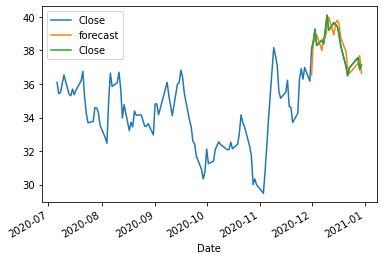

In [15]:
# Criação do eixo para a série temporal e adicionar a partir do mopdel esse eixo.
eixo = base.plot()
# Plot insample faz ir aos dados originais
trained_model.plot_predict('2020-12', '2020-12-30', ax = eixo, plot_insample= True)

plt.show()

Vamos usar o Arima automático

In [25]:
auto_model = auto_arima(base, m=12, seasonal=True, trace=False)

auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  122
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -162.080
Date:                              Mon, 04 Jan 2021   AIC                            328.161
Time:                                      21:54:50   BIC                            333.752
Sample:                                           0   HQIC                           330.432
                                              - 122                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.2000      0.108      1.848      0.065      -0.012       0.412
sigma2         0.8497      0.095      8.986      0.000       0.664       1.035
===================================================================================
Ljung-Box (L1) (Q):                   1.80   Jarque-Bera (JB):                30.78
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                             0.83
Prob(H) (two-sided):                  0.24   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

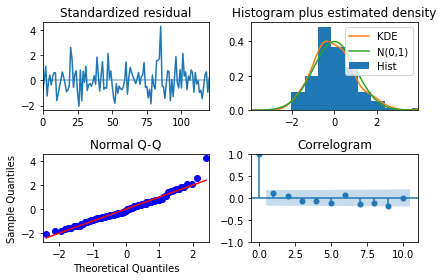

In [26]:
auto_model.plot_diagnostics()
plt.tight_layout()

Vamos fazer o Plot usando os melhores valores que o auto_arima encontrou

/home/sena/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/sena/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


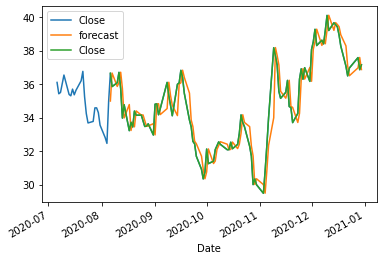

In [31]:
auto_model_2 = ARIMA(base, order=(0,1,0))
auto_trained_model = auto_model_2.fit()
auto_trained_model.summary()

# Criação do eixo para a série temporal e adicionar a partir do mopdel esse eixo.
auto_eixo = base.plot()
# Plot insample faz ir aos dados originais
auto_trained_model.plot_predict('2020-08-06', '2020-12-30', ax = auto_eixo, plot_insample= True)

plt.show()

In [32]:
auto_model.predict(6)

array([36.97701255, 37.09080503, 37.0374114 , 37.03368941, 36.85699508,
       36.71258025])